# Visualizing Earnings Based on College Majors

For this project, I will be using data released by the American Community Survey to visualize the earnings based on college majors. This data stretches from 2010 to 2012, and includes the following data;

- Rank - Rank by median earnings
- Major_code - Major code
- Major - Major description
- Major_category - Category of major 
- Total - Total number of people with major
- Sample_size - Sample size (unweighted) of full-time
- Men - Male graduates
- Women - Female graduates
- ShareWomen - Women as share of total
- Employed - Number employed
- Median - Median salary of full-time, year-round workers
- Low_wage_jobs - Number in low-wage service jobs
- Full_time - Number employed 35 hours or more
- Part_time - Number employed less than 35 hours

Using these data categories we will attempt to answer the following questions through graphical visualizations;

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It looks as though there is one row missing from this dataset. 

In [4]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count = recent_grads.shape[0]

print(raw_data_count)
print(cleaned_data_count)

173
172


Now that that is settled, let's generate some scatter plots for the following  pairs of data categories;

- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

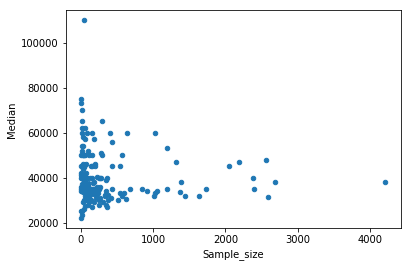

In [5]:
# Sample size vs Median
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

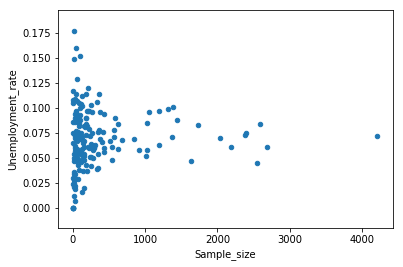

In [6]:
# Sample size vs Unemployment rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

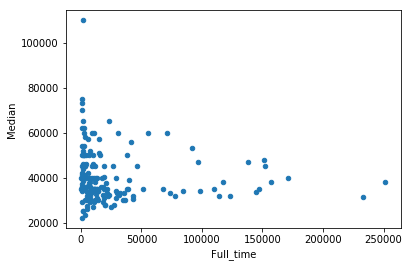

In [7]:
# Full time employment vs median
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

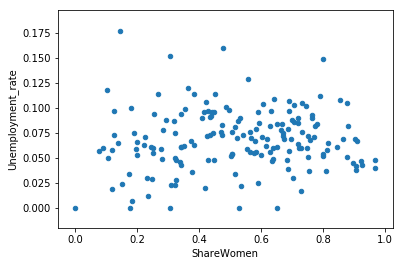

In [8]:
# Share of Women vs Unemployment_rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

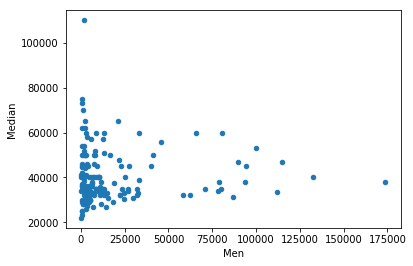

In [9]:
# Men vs Median
recent_grads.plot(x='Men', y='Median', kind='scatter')

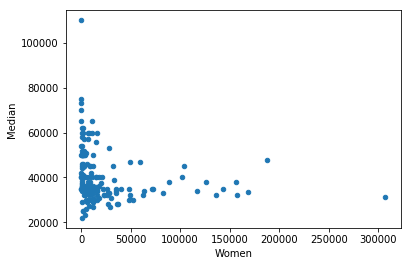

In [10]:
# Women vs Median
recent_grads.plot(x='Women', y='Median', kind='scatter')

So as you can see, there is no relation between any of these categories. Let's go back to our original question of whether students in more popular majors make more money.

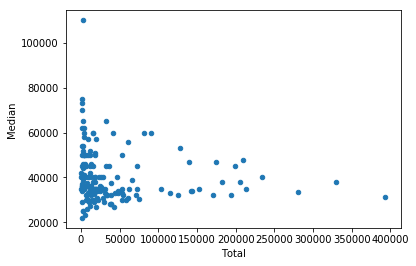

In [11]:
# Total number of Majors vs Median
recent_grads.plot(x='Total', y='Median', kind='scatter')

It looks like there is no relation between a majors popularity and the median earnings. Let's ask another question, Do students that majored in subjects that were majority female make more money?

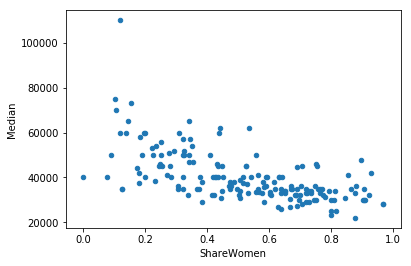

In [12]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

It does seem as though students majoring in subjects that have a percentage of female graduates past 0.5 make less money generally. Next question is whether there is any link between the number of full-time employees and median salary.

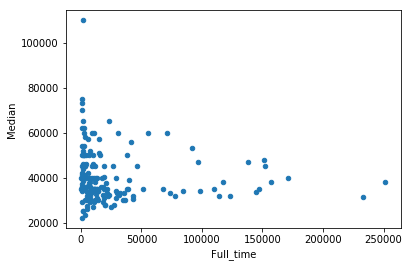

In [13]:
recent_grads.plot(x='Full_time',y='Median', kind='scatter')

Here there is no relation between the number of full time employees and median salary.

Now we are going to explore the data using histograms. We are going to explore the distribution of the following columns;
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

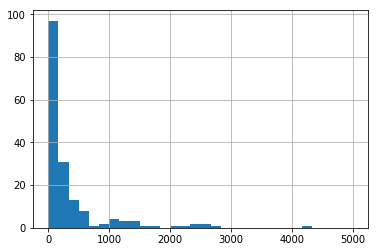

In [14]:
recent_grads['Sample_size'].hist(bins=30, range=(0,5000))

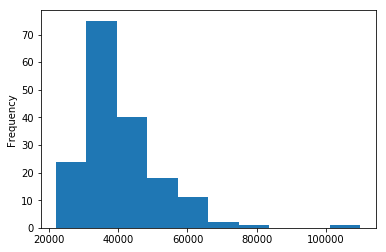

In [15]:
recent_grads['Median'].plot(kind='hist')

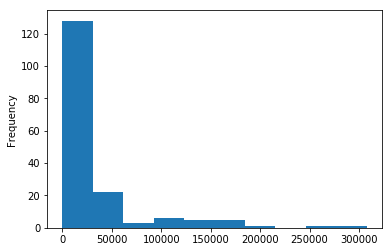

In [16]:
recent_grads['Employed'].plot(kind='hist')

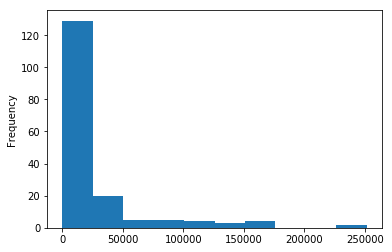

In [17]:
recent_grads['Full_time'].plot(kind='hist')

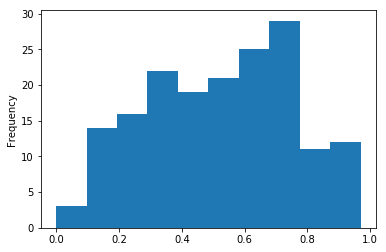

In [18]:
recent_grads['ShareWomen'].plot(kind='hist')

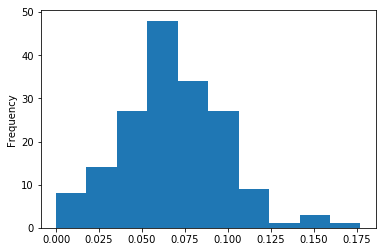

In [19]:
recent_grads['Unemployment_rate'].plot(kind='hist')

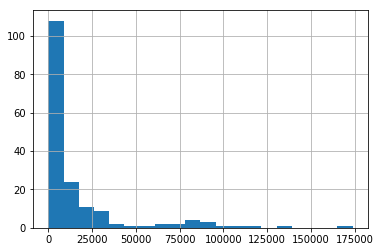

In [20]:
recent_grads['Men'].hist(bins=20)

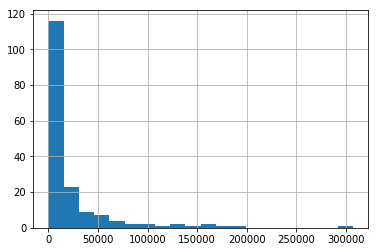

In [21]:
recent_grads['Women'].hist(bins=20)

Let's now produce some scatter matrix's, first a 2x2 using Sample_size and Median, then a 3x3 using Sample_size, Median, and Unemployment_rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025062DFC390>,
      dtype=object)

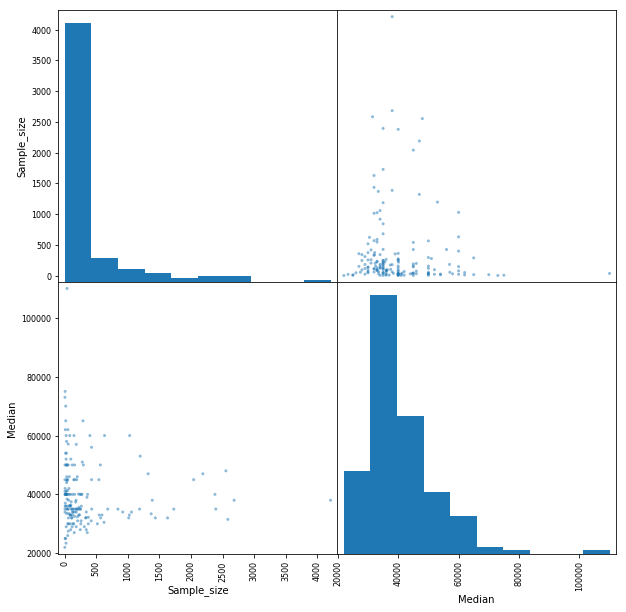

In [22]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002506183FAC8>,
      dtype=object)

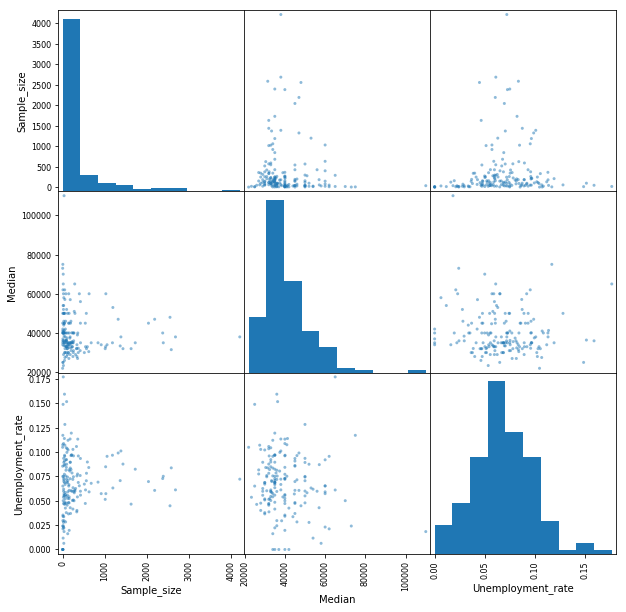

In [23]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

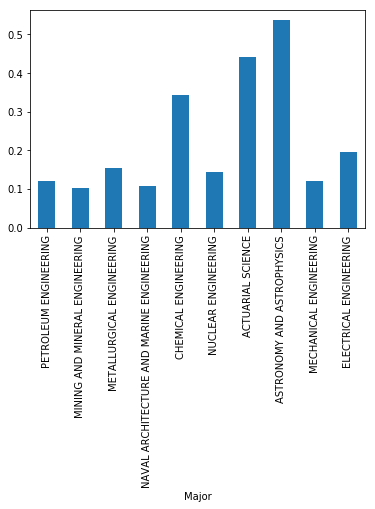

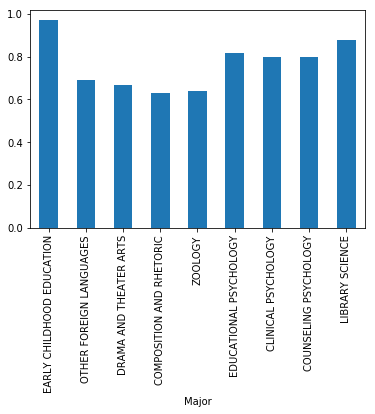

In [24]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

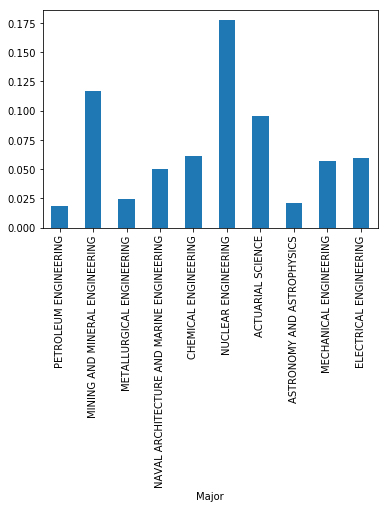

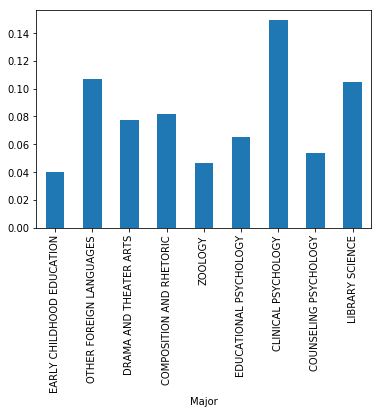

In [25]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

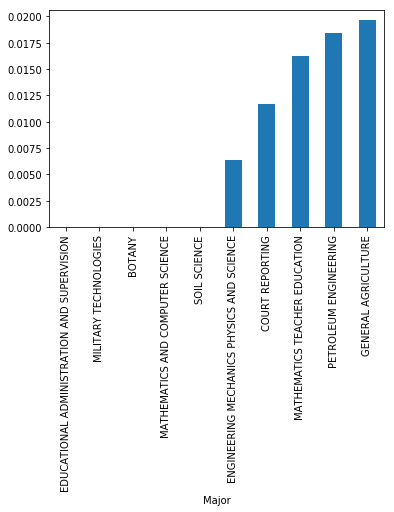

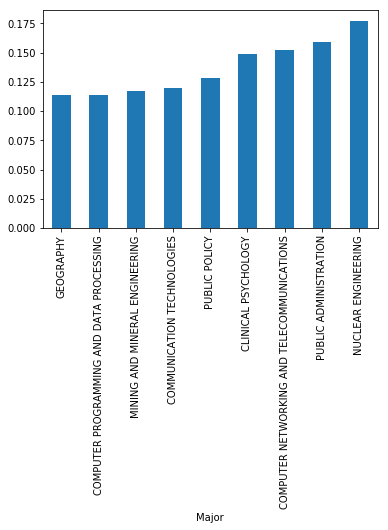

In [26]:
recent_grads = recent_grads.sort_values('Unemployment_rate')
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)